# Data Challenge Week 8

## NYC Restaurant Inspections

Please limit yourself to 4 hours time!

Place your submissions to the Submissions sub-folder with the naming convention: lastname_firstname

## Goals

You have been provided with a dataset containing inspection ratings for NYC restaurants. The structure of the files are normalized and contain various attributes regarding the restaurants and their inspections.
By design, this is an open-ended analysis. Feel free to identify trends, draw insights and recommendations (think: customer and/or inspector perspective). You are welcome to use any number of tools that you have at your disposal to complete this analysis. Because this is open-ended it is feasible that an analysis can take days if not weeks to consider all angles but for the sake of everyone's time we do not expect you spend more than 4 hours working on this. Remember that the purpose of this is to showcase your analytical skills. Please provide documentation of code cleaning and analysis (any code, scratch work, etc) - more info the better. This is great way for us to understand how you are thinking through the project.

Be as creative as you'd like but please be prudent with your time.

### Some assumptions about the project
- Potential customers would prefer to not get sick from the food they eat. But completely avoiding lower-grade restaurants might be an oversimplification. There are some tradeoffs to be considered here.
- There are a limited number of inspectors and inspections take time. Therefore the number of inspections is also limited.
- Your stakeholders are looking to you for context and recommendations.

### The data

The dataset is split into 6 parts:

In [1]:
url1 = "https://drive.google.com/open?id=1t341abdN72itsaFCFDZoKgBnaQPMvHov"
url2 = "https://drive.google.com/open?id=1iszIPPggFWn2SaS_tj_kHf6z-2CxtZeQ"
url3 = "https://drive.google.com/open?id=1peYloP2wggnguWhQ6IhbWVTjd5WyAWWL"
url4 = "https://drive.google.com/open?id=1A8KeaHWdJP5zVv4RhvwC4n4rfnFtBojE"
url5 = "https://drive.google.com/open?id=19nxG3ftaKqLSMsYMt2NQqxuXO1WtnMJw"
url6 = "https://drive.google.com/open?id=1jCuHTRlU-N70V3ye_ltnl8LHxd0Pskj1"

plus a [dictionary](https://drive.google.com/open?id=1KNbO1Ctm2rh64QL2eQXBD7iOsHl4mifp).

# Exploratory Data Analysis

In [2]:
import pandas as pd
import io
import requests

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
datapath = '/media/pedro/Seagate Backup Plus Drive/Insight/datasets/DC_Week8'

In [5]:
inputfiles=[]
for i in range(1,6):
    inputfiles.append(datapath+'/DOHMH_New_York_City_Restaurant_Inspection_Results_'+str(i)+'_of_6.txt')

In [6]:
list_=[]
for file_ in inputfiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
df = pd.concat(list_)

In [7]:
df.head()

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
3,3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
4,4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection


Let's drop this useless second column:

In [8]:
df = df.drop(columns = [df.columns[0]])

Lower case the column names

In [9]:
df.columns = df.columns.str.lower()

In [10]:
df.columns = df.columns.str.replace(' ', '_')

Let's look at what fraction of our restaurants have been inspected:

In [11]:
sum(df['inspection_date'].isna())

0

Ok so our dataset only has restaurants that have been expected at some point

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333265 entries, 0 to 66652
Data columns (total 18 columns):
camis                    333265 non-null int64
dba                      332974 non-null object
boro                     333265 non-null object
building                 333176 non-null object
street                   333257 non-null object
zipcode                  333257 non-null float64
phone                    333260 non-null object
cuisine_description      333265 non-null object
inspection_date          333265 non-null object
action                   332315 non-null object
violation_code           327801 non-null object
violation_description    327397 non-null object
critical_flag            333265 non-null object
score                    313817 non-null float64
grade                    162863 non-null object
grade_date               160700 non-null object
record_date              333265 non-null object
inspection_type          332315 non-null object
dtypes: float64(2), int64

We see that the columns 'GRADE' and 'GRADE DATE' have missing values about half the time, and a total of 66653 rows in our table (1_of_6).

In [13]:
df.describe()

,camis,zipcode,score
count,3.332650e+05,333257.000000,313817.000000
mean,4.441675e+07,10673.045055,18.905327
std,4.244860e+06,599.021620,12.948253
min,3.007544e+07,10001.000000,-2.000000
25%,4.121652e+07,10022.000000,11.000000
50%,4.160924e+07,10467.000000,15.000000
75%,5.000924e+07,11229.000000,24.000000
max,5.006908e+07,11697.000000,151.000000


Let's plot some interesting distributions:

In [14]:
cat_vars = ['violation_code', 'critical_flag', 'score', 'grade', 
            'inspection_type', 'action', 'boro', 'cuisine_description']

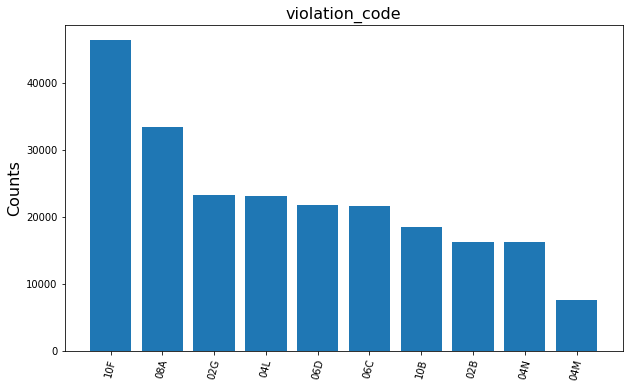

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
c = cat_vars[0]
c_top10 = df[c].value_counts()[:10]
plt.bar( x=c_top10.index.str[:50], height = c_top10)
plt.xticks(rotation=75);
ax.set_ylabel('Counts', fontsize=16);
ax.set_title(c, fontsize=16);

In [16]:
critical_violations = df.loc[df['critical_flag']=='Critical', 'violation_code'].value_counts().index.sort_values()
print(critical_violations)

Index(['02A', '02B', '02C', '02D', '02E', '02F', '02G', '02H', '02I', '02J',
       '03A', '03B', '03C', '03D', '03E', '03F', '03G', '04A', '04B', '04C',
       '04D', '04E', '04F', '04G', '04H', '04I', '04J', '04K', '04L', '04M',
       '04N', '04O', '05A', '05B', '05C', '05D', '05E', '05F', '05H', '05I',
       '06A', '06B', '06C', '06D', '06E', '06F', '06G', '06H', '06I', '07A'],
      dtype='object')


We see that ['02G', '04L', '06D', '06C', 'O2B', 'O4N'] are all fairly common critical violations. Let's see what they mean:

In [17]:
df.loc[df['violation_code'].isin(['02G', '04L', '06D', '06C', 'O2B', 'O4N', '08A']), 
       ['violation_code','violation_description']].drop_duplicates()

,violation_code,violation_description
3,02G,Cold food item held above 41Âº F (smoked fish ...
13,08A,Facility not vermin proof. Harborage or condit...
24,06C,Food not protected from potential source of co...
29,06D,"Food contact surface not properly washed, rins..."
49,04L,Evidence of mice or live mice present in facil...


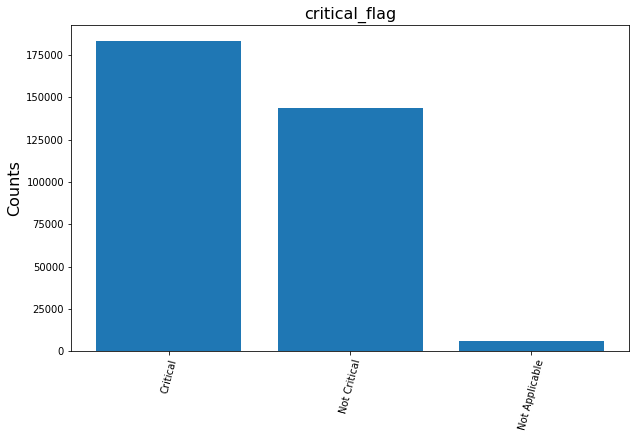

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
c = cat_vars[1]
c_top10 = df[c].value_counts()[:10]
plt.bar( x=c_top10.index, height = c_top10)
plt.xticks(rotation=75);
ax.set_ylabel('Counts', fontsize=16);
ax.set_title(c, fontsize=16);

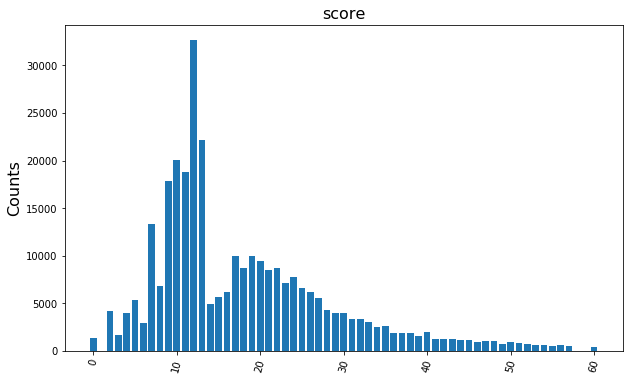

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
c = cat_vars[2]
c_top10 = df[c].value_counts()[:60]
plt.bar( x=c_top10.index, height = c_top10)
plt.xticks(rotation=75);
ax.set_ylabel('Counts', fontsize=16);
ax.set_title(c, fontsize=16);

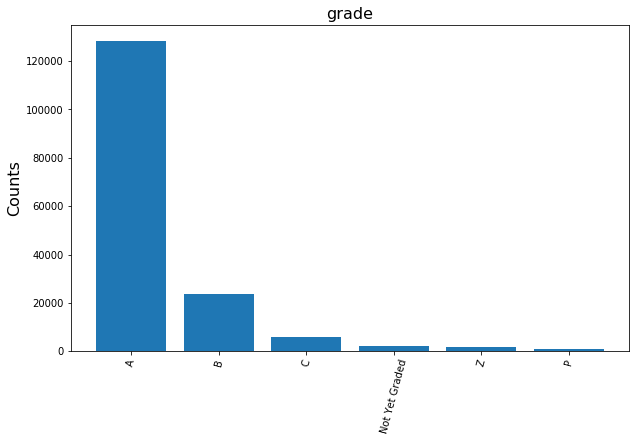

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
c = cat_vars[3]
c_top10 = df[c].value_counts()[:10]
plt.bar( x=c_top10.index, height = c_top10)
plt.xticks(rotation=75);
ax.set_ylabel('Counts', fontsize=16);
ax.set_title(c, fontsize=16);

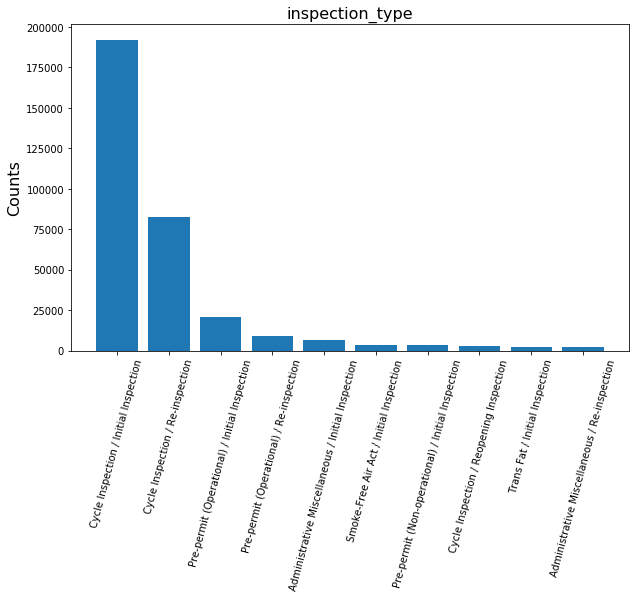

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
c = cat_vars[4]
c_top10 = df[c].value_counts()[:10]
plt.bar( x=c_top10.index, height = c_top10)
plt.xticks(rotation=75);
ax.set_ylabel('Counts', fontsize=16);
ax.set_title(c, fontsize=16);

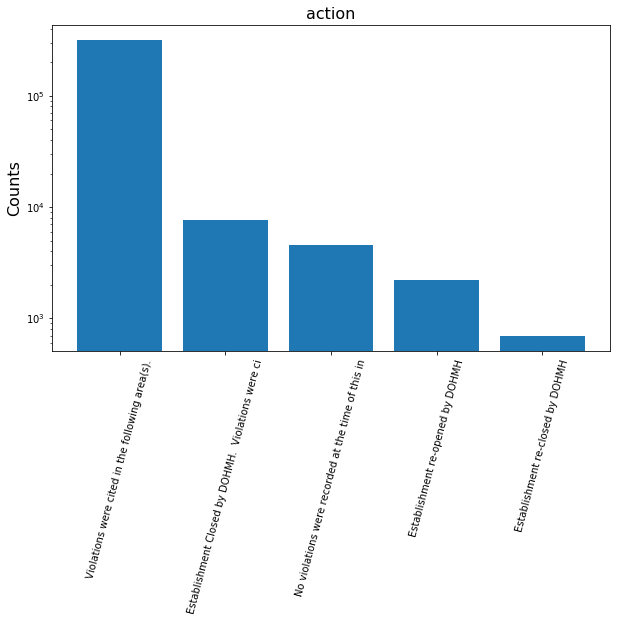

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
c = cat_vars[5]
c_top10 = df[c].value_counts()[:10]
plt.bar( x=c_top10.index.str[:50], height = c_top10)
plt.xticks(rotation=75);
ax.set_ylabel('Counts', fontsize=16);
ax.set_title(c, fontsize=16);
ax.set_yscale('log')

In [23]:
df['action'].value_counts()[1]/df.shape[0]

0.02313474262223756

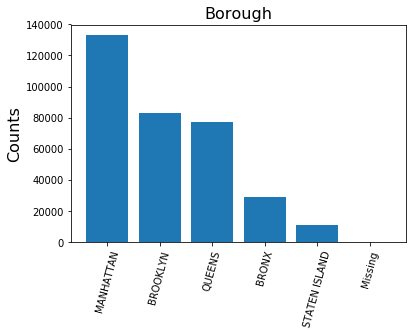

In [24]:
fig, ax = plt.subplots(figsize=(6,4))
c = cat_vars[6]
c_top10 = df[c].value_counts()[:10]
plt.bar( x=c_top10.index, height = c_top10)
plt.xticks(rotation=75);
ax.set_ylabel('Counts', fontsize=16);
ax.set_title('Borough', fontsize=16);

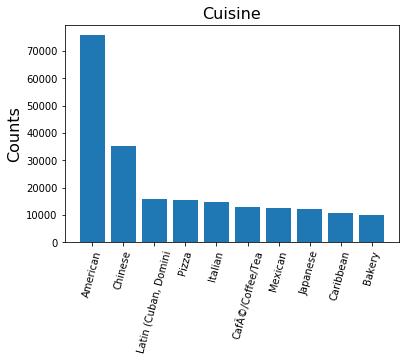

In [25]:
fig, ax = plt.subplots(figsize=(6,4))
c = cat_vars[7]
c_top10 = df[c].value_counts()[:10]
plt.bar( x=c_top10.index.str[:20], height = c_top10)
plt.xticks(rotation=75);
ax.set_ylabel('Counts', fontsize=16);
ax.set_title('Cuisine', fontsize=16);

### Thus we can make the following preliminary conclusions:

- The overwhelmingly most common action following an inspection was to simply cite the restaurant in certain areas (95%).
- 2% of restaurants are closed following an inspection
- The most common grade awarded is an 'A'
- The majority of inspections are cycle inspections (either during opening or a re-inspection), followed by the same cycle inspections for operational reasons.
- The score distribution is bimodal, with a sharp peak at 12 and a broader one at 20.
- '10F' and '08A' are the most common violations
- A little more than half the violations have high risk of causing food illness
- The majority of restaurants serve 'American' food, followed by chinese and then a fairly even spread of other cuisines

## Let's predict restaurants that are likely to pass health inspections

We may want to optimize how we flag restaurants for inspections. A very high end restaurant may be far less likely to fail inspections than others, or perhaps it is cuisine-specific. 

Can we build a model to give a probability that an inspection will actually lead to a restaurant closure? Let's try!

First of all I can't use features that only exist after the inspection is performed, that'd be cheating. For example, I want to predict 'ACTION' but using 'GRADE' or 'SCORE' is not realistic. Let's list the features we can actually use:

In [26]:
df.columns

Index(['camis', 'dba', 'boro', 'building', 'street', 'zipcode', 'phone',
       'cuisine_description', 'inspection_date', 'action', 'violation_code',
       'violation_description', 'critical_flag', 'score', 'grade',
       'grade_date', 'record_date', 'inspection_type'],
      dtype='object')

In [27]:
cols_can_use = ['camis', 'dba', 'boro', 'building', 'street', 'zipcode', 'phone', 'cuisine_description']

Of the above we see we have very few features to make this prediction. The 'camis', 'dba', 'building', 'phone' columns probably add little to nothing to our predictive power. The 'street' ('boro') column are probably too granular (coarse) and redundant with 'zipcode'. 

So that leaves us with basically 2 variables: zipcode and cuisine_description. **Thus we find that this data is likely insufficient to give a probability estimator of a restaurant shutting down**

In [28]:
df['action'].value_counts()

Violations were cited in the following area(s).                                                                                        317171
Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.      7710
No violations were recorded at the time of this inspection.                                                                              4517
Establishment re-opened by DOHMH                                                                                                         2227
Establishment re-closed by DOHMH                                                                                                          690
Name: action, dtype: int64

In [29]:
temp = pd.get_dummies(df['action'])

In [30]:
temp.head()

,Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.,Establishment re-closed by DOHMH,Establishment re-opened by DOHMH,No violations were recorded at the time of this inspection.,Violations were cited in the following area(s).
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [31]:
temp.columns = ['closed', 'reclosed', 'reopened', 'noviolations', 'citation']

In [32]:
df = pd.concat([df, temp], axis=1)

In [33]:
df.head()

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,...,score,grade,grade_date,record_date,inspection_type,closed,reclosed,reopened,noviolations,citation
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,...,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,0,0,0,0,1
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,...,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection,0,0,0,0,1
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,...,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection,0,0,0,0,1
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,...,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection,0,0,0,0,1
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,...,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,0,0,0,0,1


### Let's see if there is significant score/grade spread for similar violations

Maybe we could automatize scoring to avoid outliers

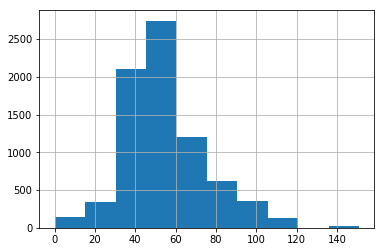

In [34]:
df.loc[df['closed']==1, 'score'].hist()

The department of health translates scores as the following:

- 90 Good:	
    - Typically, only lower-risk health and safety violations observed
    - May have high-risk violations

- 86-90 Adequate 	
    - Several violations observed
    - May have high-risk violations

- 71-85 Needs Improvement 	
    - Multiple violations observed
    - Typically, several high-risk violations

- Less than or equal to 70 	Poor 	
    - Multiple violations observed
    - Typically, several high-risk violations



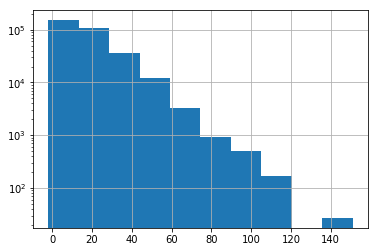

In [35]:
df['score'].dropna().hist()
plt.yscale('log')

This is a bit odd, it seems less than 1% of our restaurants are 'Good'. Definitely worth asking whoever made the dataset. **My interpretation is that the higher the score, the greater the number of violations**. This seems supported by plotting scores of closed/not-closed:

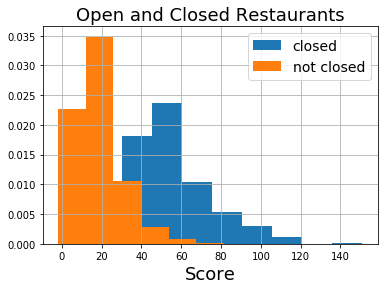

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['score'].loc[df['closed']==1].hist(label='closed', bins=10, density=True, ax=ax);
df['score'].loc[df['closed']==0].hist(label='not closed', bins=10, density=True, ax=ax);
ax.set_xlabel('Score', fontsize=18)
ax.set_title('Open and Closed Restaurants', fontsize=18)
plt.legend(fontsize=14)


## So what kind of predictive models would be interesting?

Maybe we could help users gauge how clean restaurants of that type in that area are. But because we have so few features, a simply groupby would show this:

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333265 entries, 0 to 66652
Data columns (total 23 columns):
camis                    333265 non-null int64
dba                      332974 non-null object
boro                     333265 non-null object
building                 333176 non-null object
street                   333257 non-null object
zipcode                  333257 non-null float64
phone                    333260 non-null object
cuisine_description      333265 non-null object
inspection_date          333265 non-null object
action                   332315 non-null object
violation_code           327801 non-null object
violation_description    327397 non-null object
critical_flag            333265 non-null object
score                    313817 non-null float64
grade                    162863 non-null object
grade_date               160700 non-null object
record_date              333265 non-null object
inspection_type          332315 non-null object
closed                   

Text(0.5, 1.0, 'Clean Restaurants')

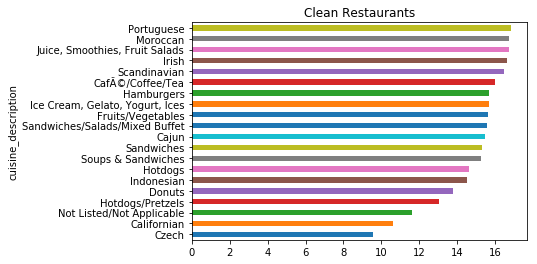

In [38]:
fig, ax = plt.subplots()
ax = df.groupby('cuisine_description')['score'].mean().sort_values()[:20].plot(kind='barh')
ax.set_title('Clean Restaurants')

Text(0.5, 1.0, 'Restaurants with more violations')

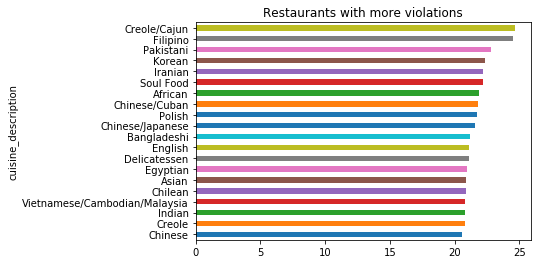

In [39]:
fig, ax = plt.subplots()
ax = df.groupby('cuisine_description')['score'].mean().sort_values()[-20:].plot(kind='barh')
ax.set_title('Restaurants with more violations')

In [40]:
temp = pd.get_dummies(df['cuisine_description'])
df = pd.concat([df,temp], axis=1)
df.head()

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,...,Soups & Sandwiches,Southwestern,Spanish,Steak,Tapas,Tex-Mex,Thai,Turkish,Vegetarian,Vietnamese/Cambodian/Malaysia
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,...,0,0,0,0,0,0,0,0,0,0
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,...,0,0,0,0,0,0,0,0,0,0
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,...,0,0,0,0,0,0,0,0,0,0
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,...,0,0,0,0,0,0,0,0,0,0
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,...,0,0,0,0,0,0,0,0,0,0


### Make zipcode categorical

In a better situation we'd use google api to get lat,lon based on street and building number

In [41]:
df.loc[df['zipcode'].notna(), 'zipcode'] = df.loc[df['zipcode'].notna(), 'zipcode'].astype(str)

In [42]:
df.columns[:25]

Index(['camis', 'dba', 'boro', 'building', 'street', 'zipcode', 'phone',
       'cuisine_description', 'inspection_date', 'action', 'violation_code',
       'violation_description', 'critical_flag', 'score', 'grade',
       'grade_date', 'record_date', 'inspection_type', 'closed', 'reclosed',
       'reopened', 'noviolations', 'citation', 'Afghan', 'African'],
      dtype='object')

In [43]:
df = df.drop(columns=['camis', 'dba', 'phone', 'building', 'street',
                      'violation_description', 'inspection_date', 'grade_date', 'record_date'])

In [44]:
df['zipcode'].nunique()

232

In [45]:
def do_ohe(X, catvar):
    temp = pd.get_dummies(X[catvar])
    X = pd.concat([X,temp], axis=1)
    X = X.drop(columns=[catvar])
    return X

In [46]:
df_categorical = df.select_dtypes(include='object')
for c in df_categorical.columns:
    print('At column {}'.format(c))
    if df[c].dtype == 'object':
        print('Doing ohe for column {}'.format(c))
        df = do_ohe(df, c)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333265 entries, 0 to 66652
Columns: 181 entries, boro to Vietnamese/Cambodian/Malaysia
dtypes: float64(1), object(7), uint8(173)
memory usage: 77.9+ MB


## Regression based on zipcode and cuisine

In [49]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [73]:
df_clean = df.dropna()

In [74]:
df_clean.shape

(162072, 181)

In [75]:
df_clean = df_clean.sample(50000).dropna()

In [76]:
# An approximate 70/15/15 split
X_train, X_test, y_train, y_test = \
train_test_split(df_clean, df_clean['score'], test_size=0.15)

In [77]:
#X_train, X_val, y_train, y_val \
#    = train_test_split(X_train, y_train, test_size=0.176)

In [78]:
X_train.shape

(42500, 181)

In [79]:
X_train.columns

Index(['boro', 'zipcode', 'action', 'violation_code', 'critical_flag', 'score',
       'grade', 'inspection_type', 'closed', 'reclosed',
       ...
       'Soups & Sandwiches', 'Southwestern', 'Spanish', 'Steak', 'Tapas',
       'Tex-Mex', 'Thai', 'Turkish', 'Vegetarian',
       'Vietnamese/Cambodian/Malaysia'],
      dtype='object', length=181)

In [80]:
print(X_train.shape[0]/df_clean.shape[0])
#print(X_val.shape[0]/df_clean.shape[0])
print(X_test.shape[0]/df_clean.shape[0])

0.85
0.15


### Using GridSearchCV

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
parameters = {'max_depth':[5], 'n_estimators':[200]}
reg = RandomForestRegressor(parameters)

In [83]:
#from sklearn.linear_model import LogisticRegression, LinearRegression
#from sklearn.neighbors import KNeighborsRegressor
#parameters = {'C': [0.01, 0.1, 1.], 'class_weight': ['balanced', None]}
#parameters = {'n_neighbors': [2,5,10,20]}
#reg = KNeighborsRegressor()

In [84]:
clf = GridSearchCV(reg, parameters, cv=5)
clf.fit(X_train, y_train)

/home/pedro/anaconda3/envs/insight/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
print(clf.best_estimator_)

In [ ]:
print(clf.best_score_)

In [ ]:
y_test_pred = clf.predict(X_test)

In [ ]:
mean_absolute_error(y_test, y_test_pred)

In [ ]:
r2_score(y_test, y_test_pred)

In [ ]:
(y_test_pred-y_test).hist()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_test[:10]

In [ ]:
y_test_pred[:10]

### Evaluating performance!

In [ ]:
y_val_pred = reg.predict(X_val)

In [ ]:
mean_absolute_error(y_val, y_val_pred)

In [ ]:
r2_score(y_val, y_val_pred)

In [ ]:
y_test_pred = reg.predict(X_test)

In [ ]:
mean_absolute_error(y_test, y_test_pred)

In [ ]:
r2_score(y_test, y_test_pred)